In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm,AsinhNorm
import galsim
from scipy.optimize import least_squares
import requests
from astropy.io import fits

## Problem 1

This is the final test.

The code block below downloads a star and a quasar image from the Legacy Surveys data.

Your task:
Assume that the star is a good representation of the PSF.
Fit a model to the quasar, and determine whether there is any extended flux.

It will be helpful to convert these two images to galsim InterpolatedImage objects, on which you can do all the things we've done with simulated data earlier. There's a line of code below that does that for you.



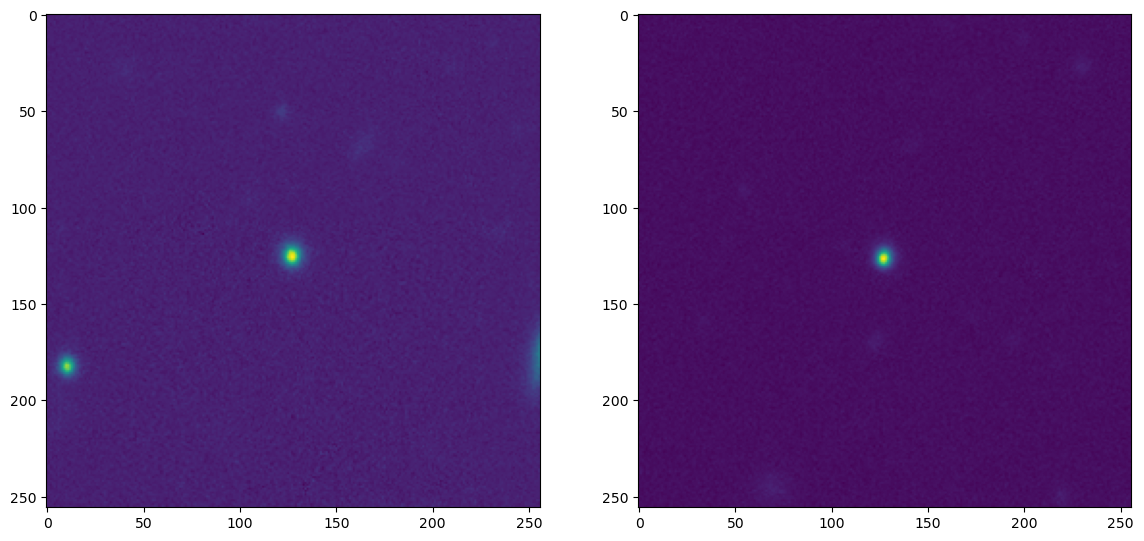

In [17]:
quasar_url = "https://www.legacysurvey.org/viewer/cutout.fits?ra=179.6303&dec=30.0749&layer=ls-dr10&pixscale=0.25"
star_url = "https://www.legacysurvey.org/viewer/cutout.fits?ra=179.6304&dec=30.1169&layer=ls-dr10&pixscale=0.25"

def get(url):
    r = requests.request("GET",url)
    filename =  r.headers['content-disposition'].split('filename=')[1].replace('"','')
    with open(filename, 'wb') as f:
        f.write(r.content)
    return filename

qso_stamp_filename = get(quasar_url)
qso_image = fits.getdata(qso_stamp_filename)[0,:,:]


star_stamp_filename = get(star_url)
star_image = fits.getdata(star_stamp_filename)[0,:,:]


fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
ax1.imshow(qso_image)
ax2.imshow(star_image)
plt.show()


qso_obj= galsim.InterpolatedImage(galsim.Image(qso_image,scale=0.21))
star_obj = galsim.InterpolatedImage(galsim.Image(star_image,scale=0.21))